# EDA heart disease analysis

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("heart disease.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# About Dataset

## Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Content

### Attribute Information:

1. age
2. sex
3. cp- chest pain type (4 values)

   Value 0: typical angina
   
   Value 1: atypical angina
   
   Value 2: non anginal pain
   
   Value 3: asymptomatic
   
4. trestbps- resting blood pressure
5. chol- serum cholestoral in mg/dl
6. fps- fasting blood sugar > 120 mg/dl (1: True, 0: False )
7. restecg- resting electrocardiographic results (values 0,1,2)

   Value 0: normal
   
   Value 1: having ST-T wave abnormality(T wave inversion and/or ST elevation or depression of >0.05 mV)
   
   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
   
8. thalac- maximum heart rate achieved
9. exang- exercise induced angina(1 : Yes, 0: no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope- the slope of the peak exercise ST segment

    Value 1: upsloping
    
    Value 2: flat
    
    Value 3: downsloping
    
12. ca- number of major vessels (0-3) colored by flourosopy

13. thal: 0 = normal; 
          1 = fixed defect;
          2 = reversable defect

14. target:
    0= less chance of heart attack
   
    1= more chance of heart attack

In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [11]:
df.shape

(1025, 14)

In [12]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 1025
Number of Columns 14


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df.duplicated().any()

True

In [21]:
df.duplicated().sum()

723

In [22]:
df=df.drop_duplicates()

In [23]:
df.shape

(302, 14)

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

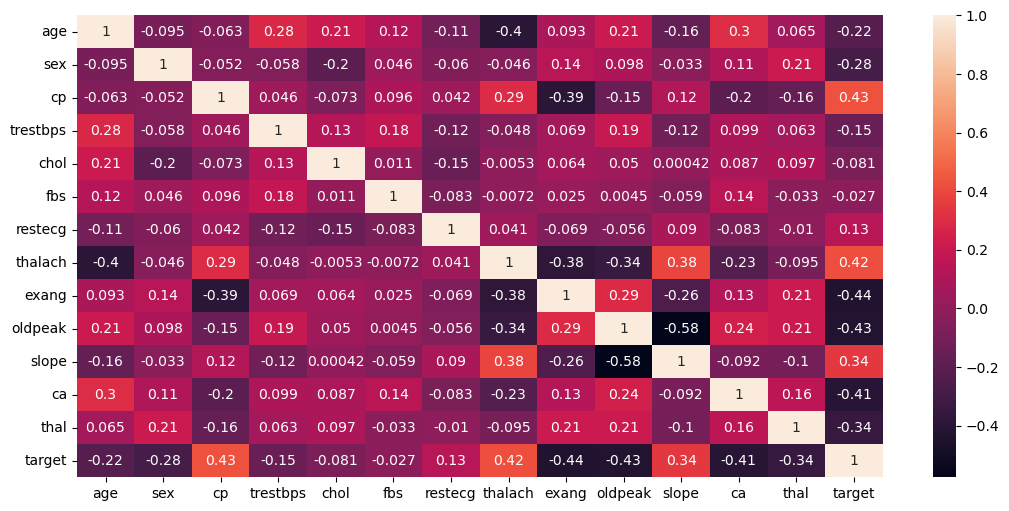

In [30]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

## insights
1. cp, thaach and slope have good posive correlation with target variable

2. age, sex,exang,oldpeak,ca and thal have good negative correlation with target variable

3. trestbps, chol,fbs have low correlation with target variable

### How many people have disease and how many have don't disease

In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [32]:
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

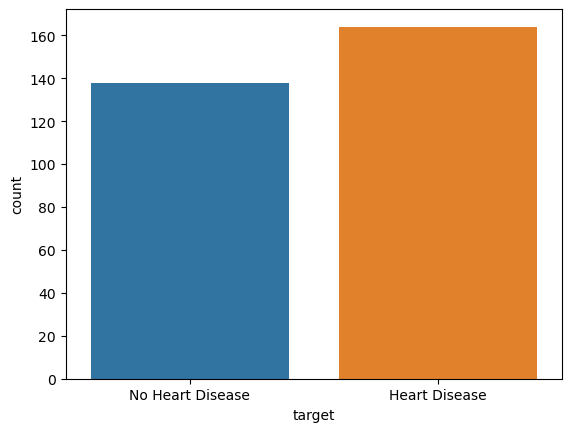

In [44]:
sns.countplot(data=df,x=df["target"])
plt.xticks([0,1],["No Heart Disease","Heart Disease"])
plt.show()

## insights
164 people have heart disease and 138 people don't have heart disease.

### count of Male and Female

In [45]:
df["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

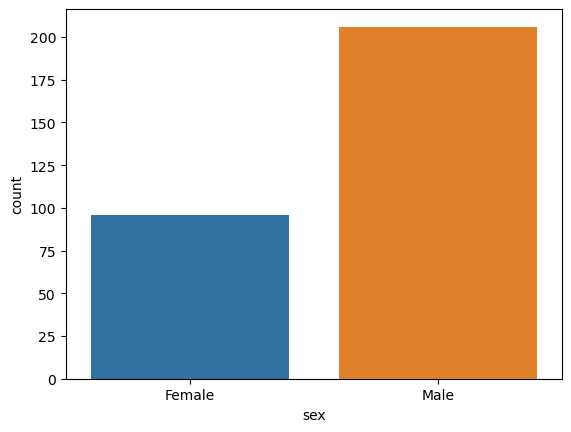

In [46]:
sns.countplot(df,x=df["sex"])
plt.xticks([0,1],["Female","Male"])
plt.show()

## Insights
96 are female and 206 are Male

### Gender distribution according to the target variable

In [47]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

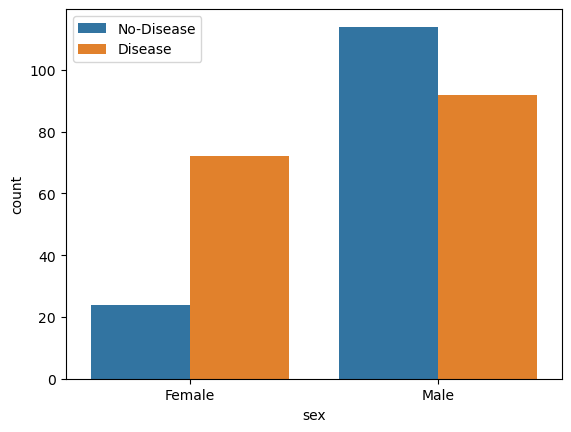

In [50]:
sns.countplot(df,x="sex",hue="target")
plt.xticks([0,1],["Female","Male"])
plt.legend(labels=["No-Disease","Disease"])
plt.show()

### Check Age distribution

/tmp/ipykernel_91/2306020834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"],bins=20)


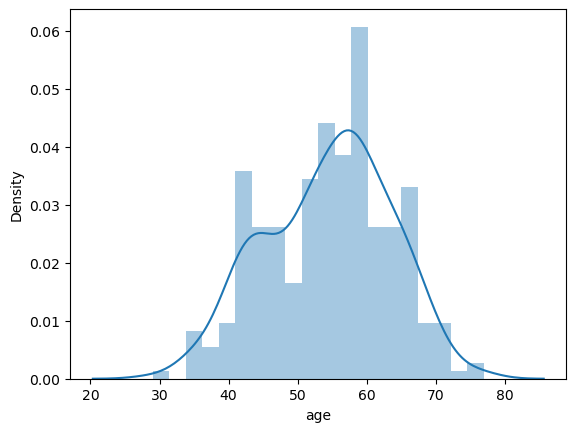

In [57]:
sns.distplot(df["age"],bins=20)
plt.show()

### check chest pain type

In [59]:
df["cp"].unique()

array([0, 1, 2, 3])

In [64]:
df["cp"].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

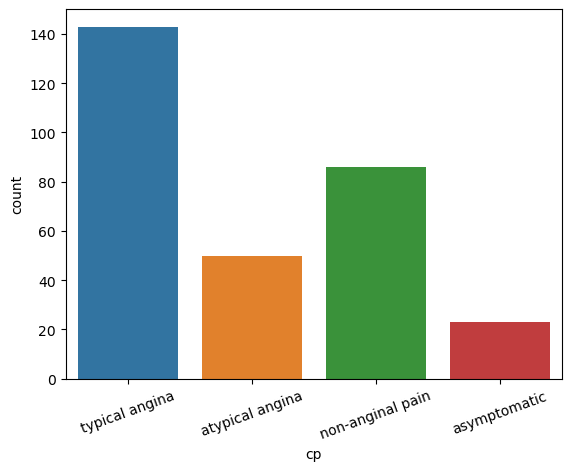

In [65]:
sns.countplot(df,x="cp")
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"],rotation=20)
plt.show()

### chest pain distribution as per target variable

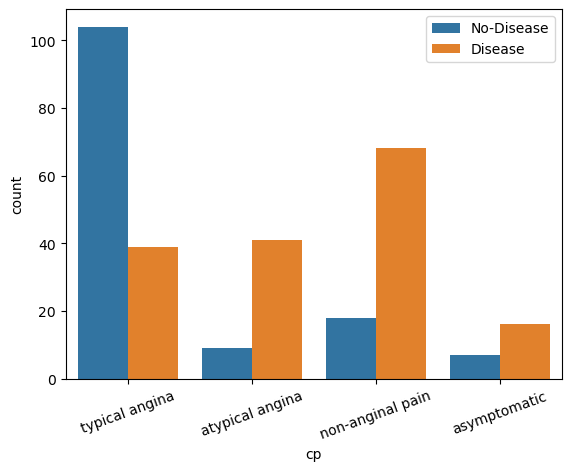

In [68]:
sns.countplot(df,x="cp",hue="target")
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"],rotation=20)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

### show fasting blood sugar according to the target variable

In [69]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [70]:
df["fbs"].unique()

array([0, 1])

In [71]:
df["fbs"].value_counts()

0    257
1     45
Name: fbs, dtype: int64

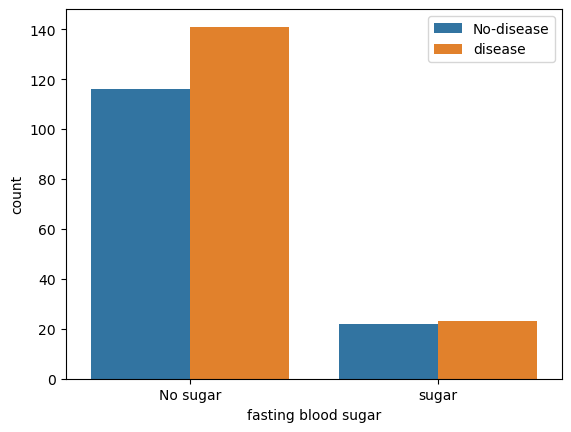

In [74]:
sns.countplot(df,x="fbs",hue="target")
plt.xticks([0,1],["No sugar","sugar"])
plt.xlabel("fasting blood sugar")
plt.legend(labels=["No-disease","disease"])
plt.show()

### checking resting blood pressure distribution

In [75]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [76]:
df["trestbps"].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

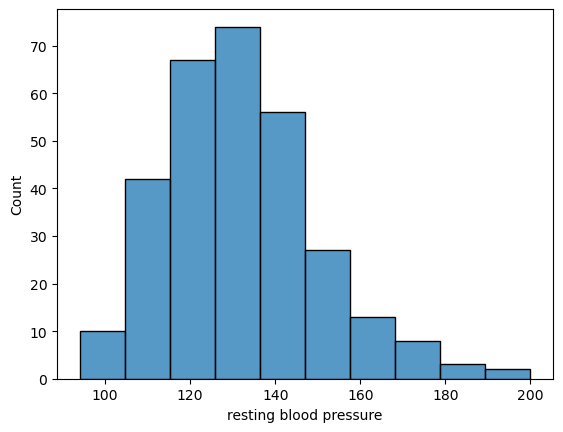

In [81]:
sns.histplot(df,x="trestbps",bins=10)
plt.xlabel("resting blood pressure")
plt.show()

### compare resting blood pressure as per sex columns

In [92]:
df["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


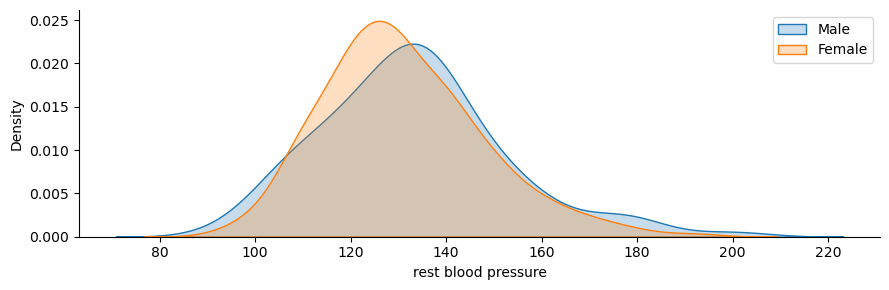

In [91]:
g=sns.FacetGrid(df,hue="sex",aspect=3)
g.map(sns.kdeplot,"trestbps",shade=True)
plt.xlabel("rest blood pressure")
plt.legend(labels=["Male","Female"])
plt.show()

### show distribution of serum cholestrol

In [97]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [98]:
df["chol"].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141])

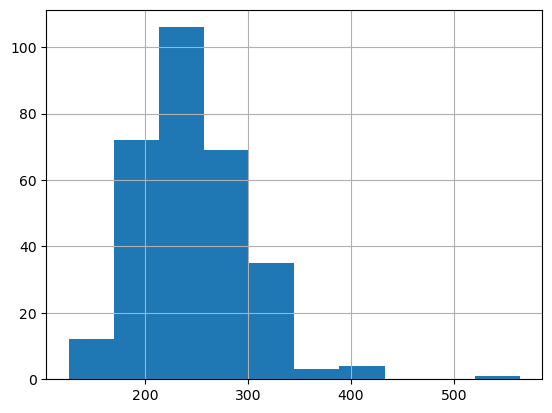

In [100]:
df["chol"].hist()
plt.show()

## insights
healthy serum cholestrol is < 200 mg/dl

## plot continuous variables

In [101]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [105]:
cat_val=[]
cont_val=[]
for column in df.columns:
    if df[column].nunique() <=10:
        cat_val.append(column)
    else:
        cont_val.append(column)

In [106]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [107]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

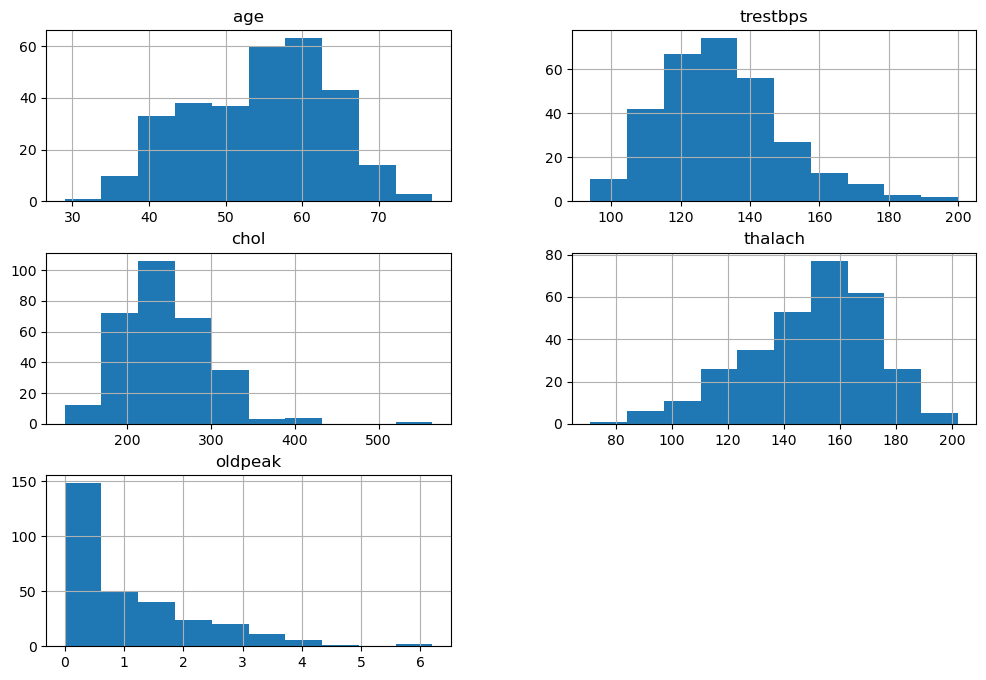

In [112]:
df.hist(cont_val,figsize=(12,8))
plt.show()

### plot categorical variable

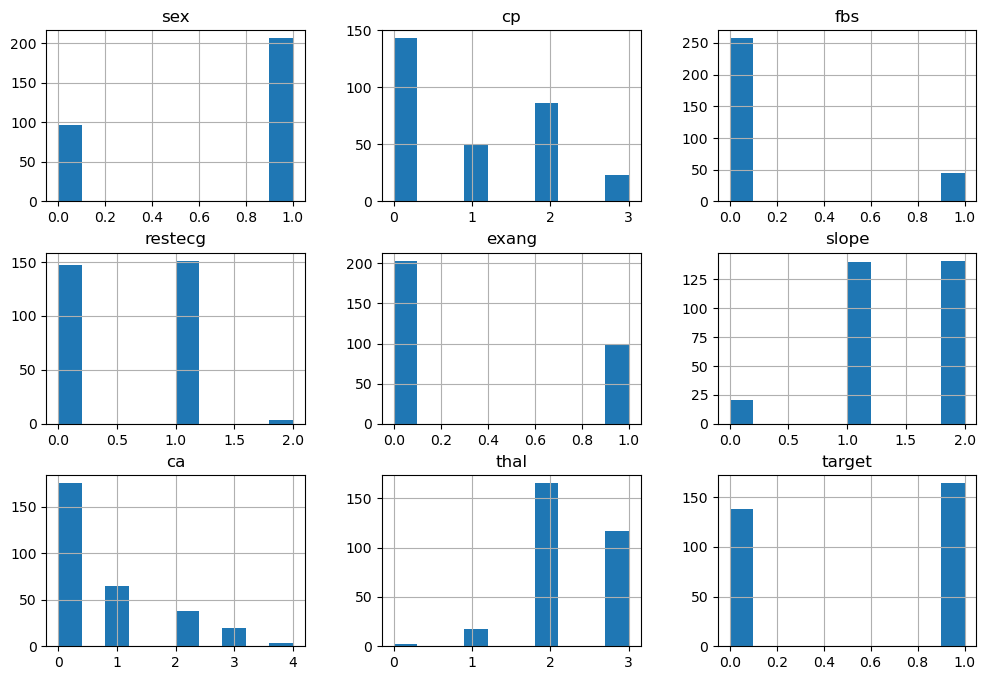

In [113]:
df.hist(cat_val,figsize=(12,8))
plt.show()